In [1]:
import bpd
from bpd.io import load_dataset

import numpy as np 
import matplotlib.pyplot as plt

In [2]:
ds_plus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_plus.npz")

ds_minus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_minus.npz")

In [4]:
g1p = ds_plus['samples']['g1']
g2p = ds_plus['samples']['g2']

g1m = ds_minus['samples']['g1']
g1p.shape, g2p.shape

((3000,), (3000,))

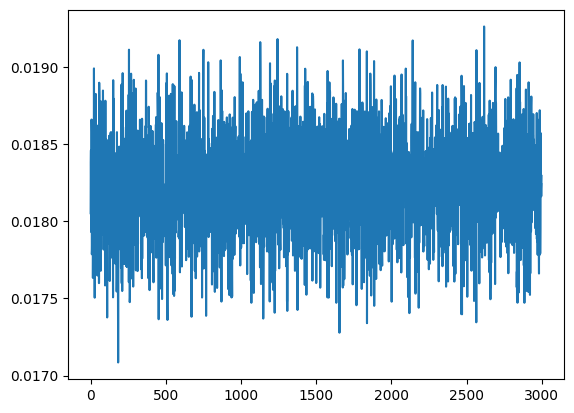

In [5]:
plt.plot(g1p)

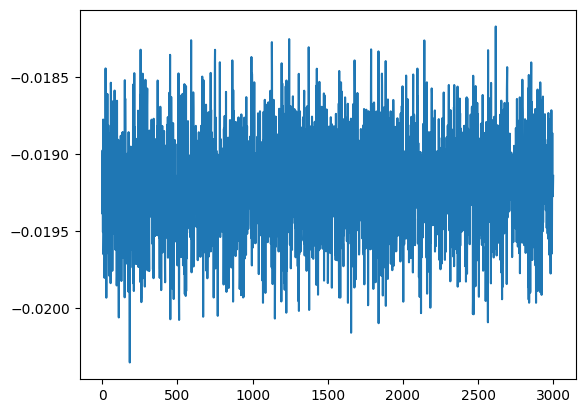

In [6]:
plt.plot(g1m)

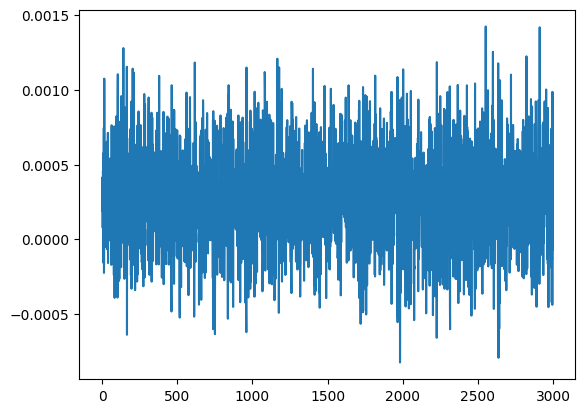

In [8]:
plt.plot(g2p)

# multiplicative bias and error

In [9]:
ds_plus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_plus.npz")
ds_minus = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_minus.npz")
ds_errs = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_513_errs.npz")

In [10]:
ds_errs['plus']['g1'].shape

(500, 1000)

In [11]:
g1p = ds_plus['samples']['g1']
g2p = ds_plus['samples']['g2']

g1m = ds_minus['samples']['g1']
g2m = ds_minus['samples']['g2']

m = (g1p.mean() - g1m.mean()) / 2/ 0.02 - 1
m # compare with -0.000177 (2 orders of magnitude larger)

np.float64(-0.06412929535713818)

In [12]:
g1ps = ds_errs['plus']['g1']
g1ms = ds_errs['minus']['g1']

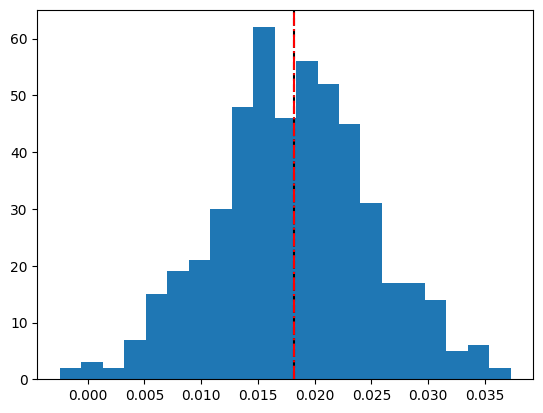

In [18]:
plt.hist(g1ps.mean(1), bins=21)
plt.axvline(g1p.mean(), c='k', ls='--')
plt.axvline(g1ps.mean(), c='r', ls='-.')

In [20]:
ms = (g1ps.mean(1) - g1ms.mean(1))/ 2/ 0.02 - 1 
ms.shape

(500,)

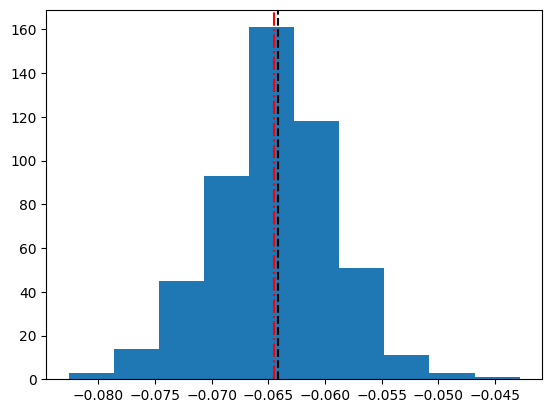

In [21]:
plt.hist(ms)
plt.axvline(m, c='k', ls="--")
plt.axvline(ms.mean(),c='r', ls='-.')

In [22]:
ms.std() / np.sqrt(len(ms))

np.float64(0.00024030478515890547)